Project 1 Write Up


What movies rank highest in score with the lowest budgets?(assuming currency is in USD) in each rating bracket?


I first started with changing the budget csv data from scientific notation to a regular number format I could use.
Once found that i grouped the data into 3 categories of movie ratings (#10-8 = Great movies, #7-5 = Good Movies and 4 & below = bad movies). Once I had that data grouped i found the lowest budget for each movie and grabbed it's rating. 



What are the Facebook Ratings of the most popular movies?

I grabbed the top 5 movies with the most facebook likes on their facebook pages from the original dataframe and put it tnto a bar graph with matplotlib.



What are the Number Of Movies produced In Non English Languages?


I grabbed the all the language data from the dataframe for each movie and placed it into a pie chart with matplotlib. Unfortuneatly the dataset was filled overwhelimingly with english movies so to keep things interesting I removed the outlier.

In [11]:
#libraries

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [12]:
#get data

clean_movie_data_csv = "clean_data.csv"
movie_df = pd.read_csv(clean_movie_data_csv)
movie_df

,Unnamed: 0,Title,Director,Movie Length (s),Genre,Headlining Actor,Gross,Keywords,Language,Country,Rating,Budget,Release Year,IMDB Score,Director Facebook Likes,Headlining Actor Facebook Likes,Movie Facebook Likes,Cast Facebook Likes
0,0,Avatar,James Cameron,178,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,760505847,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000,2009,7.9,0,1000,33000,4834
1,1,Pirates of the Caribbean: At World's End,Gore Verbinski,169,Action|Adventure|Fantasy,Johnny Depp,309404152,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,300000000,2007,7.1,563,40000,0,48350
2,2,Spectre,Sam Mendes,148,Action|Adventure|Thriller,Christoph Waltz,200074175,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,245000000,2015,6.8,0,11000,85000,11700
3,3,The Dark Knight Rises,Christopher Nolan,164,Action|Thriller,Tom Hardy,448130642,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,250000000,2012,8.5,22000,27000,164000,106759
4,5,John Carter,Andrew Stanton,132,Action|Adventure|Sci-Fi,Daryl Sabara,73058679,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13,263700000,2012,6.6,475,640,24000,1873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,5033,Primer,Shane Carruth,77,Drama|Sci-Fi|Thriller,Shane Carruth,424760,changing the future|independent film|invention...,English,USA,PG-13,7000,2004,7.0,291,291,19000,368
3812,5034,Cavite,Neill Dela Llana,80,Thriller,Ian Gamazon,70071,jihad|mindanao|philippines|security guard|squa...,English,Philippines,Not Rated,7000,2005,6.3,0,0,74,0
3813,5035,El Mariachi,Robert Rodriguez,81,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,2040920,assassin|death|guitar|gun|mariachi,Spanish,USA,R,7000,1992,6.9,0,121,0,147
3814,5037,Newlyweds,Edward Burns,95,Comedy|Drama,Kerry Bishé,4584,written and directed by cast member,English,USA,Not Rated,9000,2011,6.4,0,296,413,690


In [13]:
# What movie(s) rank highest in score with the lowest budget(s)?(assuming currency is in USD) in each rating bracket?

movie_titles = pd.Series(movie_df["Title"])
movie_scores = pd.Series(movie_df["IMDB Score"])
movie_budget = pd.Series(movie_df["Budget"])
# ,movie_df["Budget"],movie_df["IMDB Score"]


movies_budgets_scores = pd.DataFrame(movie_titles)
movies_budgets_scores["IMDB Rating"] = movie_scores
movies_budgets_scores["Budget"] = movie_budget

#movies_budgets_scores.sort_values(by=["IMDB Rating", "Budget"],ascending=[False,False])
movies_budgets_scores_high = pd.DataFrame(movies_budgets_scores[movies_budgets_scores["IMDB Rating"] > 7.9])
movies_budgets_scores_mid = pd.DataFrame(movies_budgets_scores[(movies_budgets_scores["IMDB Rating"] < 8 ) & (movies_budgets_scores["IMDB Rating"] > 4.9 )])
movies_budgets_scores_low = pd.DataFrame(movies_budgets_scores[movies_budgets_scores["IMDB Rating"] < 5])



print(movies_budgets_scores_high["Budget"].min())
print(movies_budgets_scores_mid["Budget"].min())
print(movies_budgets_scores_low["Budget"].min())


movies_budgets_scores_high




low_budget_high_rating = movies_budgets_scores_high.loc[movies_budgets_scores_high["Budget"] == 160000]
low_budget_mid_rating = movies_budgets_scores_mid.loc[movies_budgets_scores_mid["Budget"] == 218]
low_budget_low_rating = movies_budgets_scores_low.loc[movies_budgets_scores_low["Budget"] == 100000]
# 4 and below = bad movies
#7-5 = Good Movies
#10-8 = Great movies

#print(low_budget_high_rating)
#print(low_budget_mid_rating)
#print(low_budget_low_rating)

low_budget_total_rating = pd.concat([low_budget_high_rating, low_budget_mid_rating, low_budget_low_rating])


low_budget_total_rating

160000
218
100000


,Title,IMDB Rating,Budget
3748,Nothing But a Man,8.1,160000
3733,Tarnation,7.2,218
3788,The Gallows,4.2,100000


,Title,Facebook Likes Per Movie
93,Interstellar,349000
285,Django Unchained,199000
9,Batman v Superman,197000
124,Mad Max: Fury Road,191000
174,The Revenant,190000


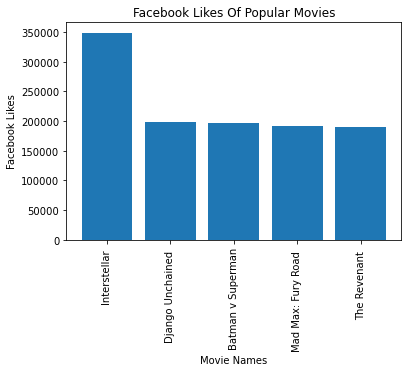

In [14]:
# Bar: Facebook Ratings of most popular movies



movie_fb_likes_df = pd.DataFrame(movie_titles)
movie_fb_likes = movie_df["Movie Facebook Likes"]
movie_fb_likes_df["Facebook Likes Per Movie"] = movie_fb_likes

pop_by_fb_likes = movie_fb_likes_df.sort_values(by=["Facebook Likes Per Movie"], ascending=False).head()

pop_by_fb_likes["Title"].replace({"Batman v Superman: Dawn of JusticeÂ ": "Batman v Superman"}, inplace=True)
pop_by_fb_likes.iloc[2,0] = "Batman v Superman"

movie_fb_likes_df
pop_by_fb_likes


x_values = pop_by_fb_likes["Title"].values
y_values = pop_by_fb_likes["Facebook Likes Per Movie"].values

plt.title("Facebook Likes Of Popular Movies")
plt.xlabel("Movie Names")
plt.ylabel("Facebook Likes")
plt.xticks(rotation='vertical')

plt.bar(x_values,y_values)


pop_by_fb_likes


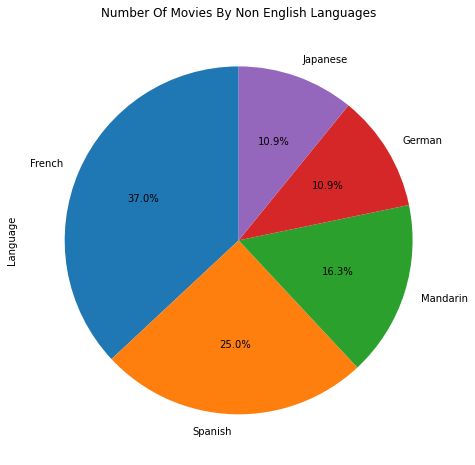

In [15]:
# Pie Chart:  languages



movie_language = movie_df["Language"].value_counts()
movie_language.drop(movie_language[movie_language == 3657].index, inplace = True)
movie_language = movie_language.head()
movie_language.plot(kind='pie', subplots=True, figsize=(8, 8), startangle = 90, autopct='%1.1f%%')

plt.title("Number Of Movies By Non English Languages")

#show the plot
plt.show()